### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_columns = 60

### Load Hourly Weather Data

Read in hour by hour weather data

In [3]:
weather = pd.read_csv("2781132.csv")

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,7,8,11,14,21,27,28,29,31,32,33,36,42,43,44,50,52,57,59,60,70,72,77,89,90,111,118,120,123) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Preview data

In [4]:
weather.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupElevationUnit,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,CDSD,CLDD,DSNW,DYHF,DYTS,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,...,REM,REPORT_TYPE.1,SOURCE.1,ShortDurationEndDate005,ShortDurationEndDate010,ShortDurationEndDate015,ShortDurationEndDate020,ShortDurationEndDate030,ShortDurationEndDate045,ShortDurationEndDate060,ShortDurationEndDate080,ShortDurationEndDate100,ShortDurationEndDate120,ShortDurationEndDate150,ShortDurationEndDate180,ShortDurationPrecipitationValue005,ShortDurationPrecipitationValue010,ShortDurationPrecipitationValue015,ShortDurationPrecipitationValue020,ShortDurationPrecipitationValue030,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
0,72510094746,2020-01-15T00:54:00,FM-15,7,NaN,SSW,50.0,yd,SNOWFALL,NaN,NaN,"SNOWBOARD, SNOWSTICK",NaN,NaN,AIRPORT GROUNDS CREW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MET14101/15/20 00:54:02 METAR KORH 150554Z 220...,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-03-28
1,72510094746,2020-01-15T01:54:00,FM-15,7,NaN,SSW,50.0,yd,SNOWFALL,NaN,NaN,"SNOWBOARD, SNOWSTICK",NaN,NaN,AIRPORT GROUNDS CREW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MET11201/15/20 01:54:02 METAR KORH 150654Z 240...,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-03-28
2,72510094746,2020-01-15T02:54:00,FM-15,7,NaN,SSW,50.0,yd,SNOWFALL,NaN,NaN,"SNOWBOARD, SNOWSTICK",NaN,NaN,AIRPORT GROUNDS CREW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MET11201/15/20 02:54:02 METAR KORH 150754Z 230...,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-03-28
3,72510094746,2020-01-15T03:54:00,FM-15,7,NaN,SSW,50.0,yd,SNOWFALL,NaN,NaN,"SNOWBOARD, SNOWSTICK",NaN,NaN,AIRPORT GROUNDS CREW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MET11701/15/20 03:54:02 METAR KORH 150854Z 250...,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-03-28
4,72510094746,2020-01-15T04:16:00,FM-16,7,NaN,SSW,50.0,yd,SNOWFALL,NaN,NaN,"SNOWBOARD, SNOWSTICK",NaN,NaN,AIRPORT GROUNDS CREW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MET09201/15/20 04:16:02 SPECI KORH 150916Z 250...,FM-16,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-03-28


In [5]:
weather.shape

(44940, 124)

Preview first half of columns 

In [6]:
weather.columns[:60]

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'AWND', 'BackupDirection',
       'BackupDistance', 'BackupDistanceUnit', 'BackupElements',
       'BackupElevation', 'BackupElevationUnit', 'BackupEquipment',
       'BackupLatitude', 'BackupLongitude', 'BackupName', 'CDSD', 'CLDD',
       'DSNW', 'DYHF', 'DYTS', 'DailyAverageDewPointTemperature',
       'DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity',
       'DailyAverageSeaLevelPressure', 'DailyAverageStationPressure',
       'DailyAverageWetBulbTemperature', 'DailyAverageWindSpeed',
       'DailyCoolingDegreeDays', 'DailyDepartureFromNormalAverageTemperature',
       'DailyHeatingDegreeDays', 'DailyMaximumDryBulbTemperature',
       'DailyMinimumDryBulbTemperature', 'DailyPeakWindDirection',
       'DailyPeakWindSpeed', 'DailyPrecipitation', 'DailySnowDepth',
       'DailySnowfall', 'DailySustainedWindDirection',
       'DailySustainedWindSpeed', 'DailyWeather', 'HDSD', 'HTDD',
       'HourlyAltimeterSetting', 'Hou

Determine which humidity column is more complete - Turns out it's the hourly measure, not daily

In [7]:
weather['HourlyRelativeHumidity'].isna().mean()

0.03440142412105029

In [8]:
weather['DailyAverageRelativeHumidity'].isna().mean()

0.9861370716510903

Select subset of columns, filter to station outside the city of Worcester, format date (drop hours/minutes), average hourly humidity across each day

In [9]:
hourly_weather = weather[['DATE', 'STATION', 'HourlyRelativeHumidity']]
hourly_weather = hourly_weather[hourly_weather['STATION'] == 72510094746]
hourly_weather['Date'] = pd.to_datetime(hourly_weather["DATE"], infer_datetime_format=True)
hourly_weather['Date'] = hourly_weather['Date'].dt.normalize()
grouped_hourly_weather = hourly_weather[['Date', 'HourlyRelativeHumidity']].groupby('Date').mean().reset_index()
grouped_hourly_weather.columns = ['Date', 'Average relative humidity']

### Load Daily Weather Data

Read in daily weather data

In [10]:
weather2 = pd.read_csv("2811240.csv")

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21,43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Filter to station outside city of Worcester, select fields with more than 1% coverage (low coverage fields include boolean weather type fields, such as fog, which is naturally infrequent), fill empty 'weather type' columns with 0, rename hard to interpret columns names, join with aggregated hourly and then fill two remaining empty cells with 0

In [11]:
daily_weather = weather2[weather2["STATION"] == 'USW00094746']
daily_weather = daily_weather.loc[:, daily_weather.isnull().mean() < .99]

daily_weather["DATE"] = pd.to_datetime(daily_weather["DATE"], infer_datetime_format=True)

daily_weather.loc[:, ["WT01","WT02","WT03","WT06","WT08"]] = daily_weather.loc[:, ["WT01","WT02","WT03","WT06","WT08"]].fillna(0)

name_map = {"DATE": "Date",
            "AWND": "Average daily wind speed (mph)",
            "PRCP": "Precipitation (in)",
            "SNOW": "Snowfall (in)", 
            "TAVG": "Average temperature (°F)",
            "TMIN": "Minimum temperature (°F)",
            "TMAX": "Maximum temperature (°F)",
            "WT01": "Fog, ice fog, or freezing fog",
            "WT02": "Heavy fog or heaving freezing fog",
            "WT03": "Thunder",
            "WT06": "Glaze or rime ",
            "WT08": "Smoke or haze"}


daily_weather = daily_weather[name_map.keys()].rename(columns=name_map)
daily_weather = daily_weather.merge(grouped_hourly_weather, on='Date', how ='inner')
daily_weather = daily_weather.fillna(0) # just two precipitation values are zero on January 26 and 27 of 2021

Confirm no further na values

In [12]:
daily_weather[daily_weather.isna().any(axis=1)]

,Date,Average daily wind speed (mph),Precipitation (in),Snowfall (in),Average temperature (°F),Minimum temperature (°F),Maximum temperature (°F),"Fog, ice fog, or freezing fog",Heavy fog or heaving freezing fog,Thunder,Glaze or rime,Smoke or haze,Average relative humidity


### Load COVID Data

In [13]:
conv_conf_cases = pd.read_csv("CONVENIENT_us_confirmed_cases.csv")
conv_meta = pd.read_csv("CONVENIENT_us_metadata.csv")
raw_conf_cases = pd.read_csv("RAW_us_confirmed_cases.csv")

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

### Given Data

In [14]:
county = "Worcester"
state = "Massachusetts"
area_km2 = 3912.88
area_mi2 = 1510.77
pop_2020 = 862111
pop_incr_2010 = 63559

### Explore, Process, and Filter Data

Locate Worcester County, MA column by transposing and filtering

In [15]:
conv_conf_cases.T[conv_conf_cases.T[0] == "Worcester"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649
Maryland.25,Worcester,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,21.0,8.0,21.0,21.0,13.0,21.0,15.0,12.0,7.0,11.0,26.0,13.0,9.0,10.0,12.0,4.0,6.0,15.0,11.0,3.0,5.0,10.0,7.0,0.0,17.0,5.0,8.0,1.0,3.0
Massachusetts.16,Worcester,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,573.0,203.0,270.0,272.0,230.0,0.0,0.0,0.0,707.0,286.0,306.0,272.0,0.0,0.0,498.0,297.0,229.0,210.0,219.0,0.0,0.0,489.0,128.0,163.0,0.0,377.0,0.0,0.0,482.0


Select and rename subset of columns and format date

Note: I also did not know that we were meant to only use the 'RAW' variation of the data until it came up in a thread on Slack. 

In [17]:
worcester = conv_conf_cases[["Province_State", "Massachusetts.16"]].iloc[1:]
worcester.columns = ["Date", "NewConfirmedCases"]

worcester["Date"] = pd.to_datetime(worcester["Date"], infer_datetime_format=True)
worcester["NewConfirmedCases"] = pd.to_numeric(worcester["NewConfirmedCases"])

worcester

,Date,NewConfirmedCases
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
...,...,...
645,2021-10-28,0.0
646,2021-10-29,377.0
647,2021-10-30,0.0
648,2021-10-31,0.0


In [18]:
worcester.columns = ["Date", "NewConfirmedCases"]

worcester["Date"] = pd.to_datetime(worcester["Date"], infer_datetime_format=True)
worcester["NewConfirmedCases"] = pd.to_numeric(worcester["NewConfirmedCases"])

worcester

,Date,NewConfirmedCases
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
...,...,...
645,2021-10-28,0.0
646,2021-10-29,377.0
647,2021-10-30,0.0
648,2021-10-31,0.0


Negative new cases was a known issue documented on kaggle. Here I checked if it applied to my county. Only one day was noticibly affected, however if we interpret these as corrections being applied then on a day when they were sufficient cases to cancel that out this indication would not show up.

In [19]:
worcester[worcester["NewConfirmedCases"] < 0]

,Date,NewConfirmedCases
225,2020-09-03,-48.0


Select and rename subset of columns and format date

In [20]:
raw_worcester = raw_conf_cases[(raw_conf_cases["Province_State"] == "Massachusetts") & (raw_conf_cases["Admin2"] == "Worcester")]
raw_worcester = raw_worcester.T.iloc[11:].reset_index()
raw_worcester.columns = ["Date", "CumuConfirmedCases"]

raw_worcester["Date"] = pd.to_datetime(raw_worcester["Date"], infer_datetime_format=True)
raw_worcester["CumuConfirmedCases"] = pd.to_numeric(raw_worcester["CumuConfirmedCases"])

raw_worcester

,Date,CumuConfirmedCases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
645,2021-10-28,95600
646,2021-10-29,95977
647,2021-10-30,95977
648,2021-10-31,95977


### Join Data

Join all time series data

In [21]:
full_df = worcester.merge(raw_worcester, on="Date", how="outer")
full_df = full_df.merge(daily_weather, on="Date",how="left")

### Feature Engineering

Derive several metrics from number of cases and population, as well as weather, then filter on dates

In [22]:
full_df["RollingAverage"] = full_df["NewConfirmedCases"].rolling(window=7).mean().round()
full_df["RateOfChange"] = full_df["NewConfirmedCases"].diff()
full_df["RollingAverageRoC"] = full_df["RateOfChange"].rolling(window=7).mean().round()

full_df["ActiveCases"] = full_df["NewConfirmedCases"].rolling(window=10).sum().shift(-2)
full_df["AtRiskPop"] = pop_2020 - full_df["ActiveCases"]
full_df["InfectionRate"] = full_df["NewConfirmedCases"]/(full_df["AtRiskPop"]/10000)# * 100
full_df["RollingAverageIR"] = full_df["InfectionRate"].rolling(window=7).mean()

full_df["AverageTempWeek"] = full_df["Average temperature (°F)"].rolling(window=7).mean()
full_df["AverageTempLastWeek"] = full_df["Average temperature (°F)"].rolling(window=7).mean().shift(7)
full_df["ChangeInAverageTempWeek"] = full_df["AverageTempWeek"] - full_df["AverageTempLastWeek"]
full_df["AveragePrecipWeek"] = full_df["Precipitation (in)"].rolling(window=7).mean()
full_df["AverageSnowWeek"] = full_df["Snowfall (in)"].rolling(window=7).mean()
full_df["ChangeInTempDay"] = full_df["Maximum temperature (°F)"] - full_df["Minimum temperature (°F)"]
full_df["MinimumTempWeek"] = full_df["Minimum temperature (°F)"].rolling(window=7).min()
full_df["MaximumTempWeek"] = full_df["Maximum temperature (°F)"].rolling(window=7).min()
full_df["TotalPrecipWeek"] = full_df["Precipitation (in)"].rolling(window=7).min()
full_df["TotalSnowfallWeek"] = full_df["Snowfall (in)"].rolling(window=7).min()

final_df = full_df[(full_df["Date"] > '2020-02-04') & (full_df["Date"] < '2021-10-31')]

Preview data

In [23]:
final_df.head()

,Date,NewConfirmedCases,CumuConfirmedCases,Average daily wind speed (mph),Precipitation (in),Snowfall (in),Average temperature (°F),Minimum temperature (°F),Maximum temperature (°F),"Fog, ice fog, or freezing fog",Heavy fog or heaving freezing fog,Thunder,Glaze or rime,Smoke or haze,Average relative humidity,RollingAverage,RateOfChange,RollingAverageRoC,ActiveCases,AtRiskPop,InfectionRate,RollingAverageIR,AverageTempWeek,AverageTempLastWeek,ChangeInAverageTempWeek,AveragePrecipWeek,AverageSnowWeek,ChangeInTempDay,MinimumTempWeek,MaximumTempWeek,TotalPrecipWeek,TotalSnowfallWeek
13,2020-02-05,0.0,0,6.71,0.05,0.0,36.0,29.0,42.0,1.0,0.0,0.0,0.0,0.0,60.846154,0.0,0.0,0.0,1.0,862110.0,0.000000,0.000000,31.857143,34.285714,-2.428571,0.010000,0.042857,13.0,12.0,33.0,0.0,0.0
14,2020-02-06,1.0,1,8.95,0.31,0.5,29.0,24.0,32.0,1.0,1.0,0.0,1.0,0.0,87.784615,0.0,1.0,0.0,1.0,862110.0,0.011599,0.001657,32.714286,33.000000,-0.285714,0.054286,0.114286,8.0,22.0,32.0,0.0,0.0
15,2020-02-07,0.0,1,16.33,0.38,0.0,31.0,21.0,39.0,1.0,1.0,0.0,1.0,0.0,88.761194,0.0,-1.0,0.0,1.0,862110.0,0.000000,0.001657,33.000000,31.857143,1.142857,0.107143,0.114286,18.0,21.0,32.0,0.0,0.0
16,2020-02-08,0.0,1,15.66,0.00,0.0,23.0,17.0,28.0,0.0,0.0,0.0,0.0,0.0,60.035714,0.0,0.0,0.0,1.0,862110.0,0.000000,0.001657,31.714286,31.428571,0.285714,0.105714,0.071429,11.0,17.0,28.0,0.0,0.0
17,2020-02-09,0.0,1,5.82,0.00,0.0,22.0,15.0,32.0,0.0,0.0,0.0,0.0,0.0,72.028571,0.0,0.0,0.0,1.0,862110.0,0.000000,0.001657,30.142857,30.714286,-0.571429,0.105714,0.071429,17.0,15.0,28.0,0.0,0.0


Create categorical column for season (fall = 0, winter = 1, spring = 2, summer = 3)

In [24]:
final_df["season"] = 0
final_df.loc[(final_df["Date"].dt.month >= 3) & (final_df["Date"].dt.month < 6), "season"] = 2
final_df.loc[(final_df["Date"].dt.month >= 6) & (final_df["Date"].dt.month < 9), "season"] = 3
final_df.loc[(final_df["Date"].dt.month >= 12) | (final_df["Date"].dt.month < 3), "season"] = 1


/Users/castle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/castle/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Create one hot encoding (excluding summer, so as not to over constrain analysis)

In [25]:
final_df['isFall'] = 0
final_df.loc[final_df["season"] == 0, "isFall"] = 1
final_df['isWinter'] = 0
final_df.loc[final_df["season"] == 1, "isWinter"] = 1
final_df['isSpring'] = 0
final_df.loc[final_df["season"] == 2, "isSpring"] = 1

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/castle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/castle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be 

In [26]:
final_df.head()

,Date,NewConfirmedCases,CumuConfirmedCases,Average daily wind speed (mph),Precipitation (in),Snowfall (in),Average temperature (°F),Minimum temperature (°F),Maximum temperature (°F),"Fog, ice fog, or freezing fog",Heavy fog or heaving freezing fog,Thunder,Glaze or rime,Smoke or haze,Average relative humidity,RollingAverage,RateOfChange,RollingAverageRoC,ActiveCases,AtRiskPop,InfectionRate,RollingAverageIR,AverageTempWeek,AverageTempLastWeek,ChangeInAverageTempWeek,AveragePrecipWeek,AverageSnowWeek,ChangeInTempDay,MinimumTempWeek,MaximumTempWeek,TotalPrecipWeek,TotalSnowfallWeek,season,isFall,isWinter,isSpring
13,2020-02-05,0.0,0,6.71,0.05,0.0,36.0,29.0,42.0,1.0,0.0,0.0,0.0,0.0,60.846154,0.0,0.0,0.0,1.0,862110.0,0.000000,0.000000,31.857143,34.285714,-2.428571,0.010000,0.042857,13.0,12.0,33.0,0.0,0.0,1,0,1,0
14,2020-02-06,1.0,1,8.95,0.31,0.5,29.0,24.0,32.0,1.0,1.0,0.0,1.0,0.0,87.784615,0.0,1.0,0.0,1.0,862110.0,0.011599,0.001657,32.714286,33.000000,-0.285714,0.054286,0.114286,8.0,22.0,32.0,0.0,0.0,1,0,1,0
15,2020-02-07,0.0,1,16.33,0.38,0.0,31.0,21.0,39.0,1.0,1.0,0.0,1.0,0.0,88.761194,0.0,-1.0,0.0,1.0,862110.0,0.000000,0.001657,33.000000,31.857143,1.142857,0.107143,0.114286,18.0,21.0,32.0,0.0,0.0,1,0,1,0
16,2020-02-08,0.0,1,15.66,0.00,0.0,23.0,17.0,28.0,0.0,0.0,0.0,0.0,0.0,60.035714,0.0,0.0,0.0,1.0,862110.0,0.000000,0.001657,31.714286,31.428571,0.285714,0.105714,0.071429,11.0,17.0,28.0,0.0,0.0,1,0,1,0
17,2020-02-09,0.0,1,5.82,0.00,0.0,22.0,15.0,32.0,0.0,0.0,0.0,0.0,0.0,72.028571,0.0,0.0,0.0,1.0,862110.0,0.000000,0.001657,30.142857,30.714286,-0.571429,0.105714,0.071429,17.0,15.0,28.0,0.0,0.0,1,0,1,0


### Visualize

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Presentation Plot: Plot the interaction between rolling average of new cases and temperature with weather as color

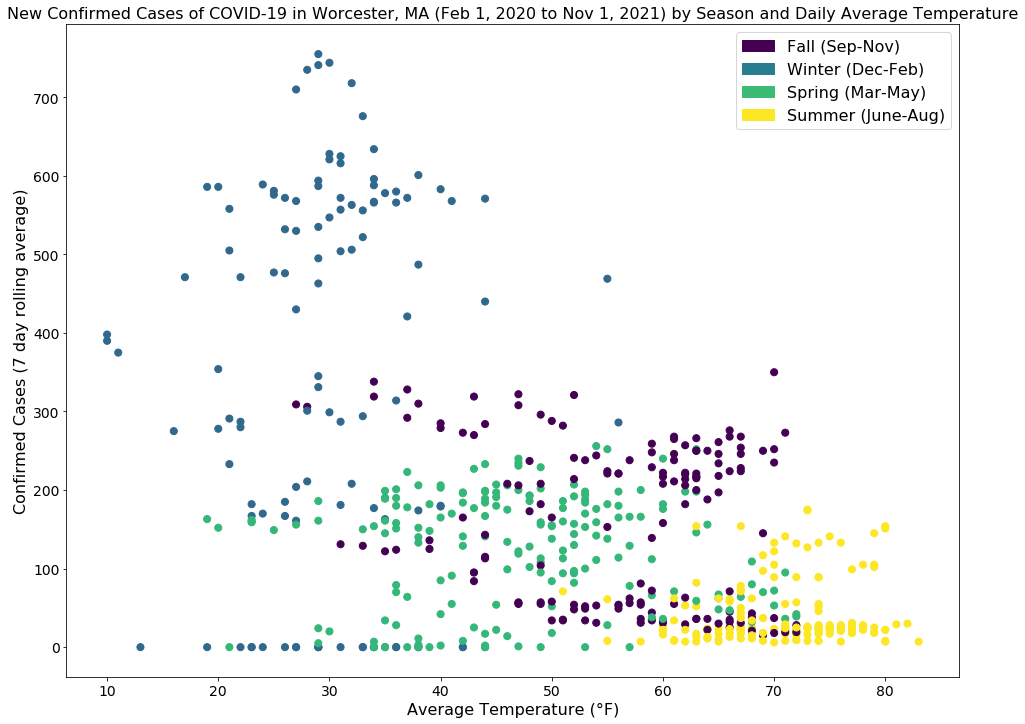

In [28]:
final_df[["RollingAverage", "Average temperature (°F)", "season"]].plot(x="Average temperature (°F)", y="RollingAverage", kind="scatter", c="season", colormap='viridis', s=50, figsize=(16,12), sharex=False, colorbar=False)

legend_elements = [mpatches.Patch(color='#440154FF', label='Fall (Sep-Nov)')]
legend_elements.append(mpatches.Patch(color='#287D8EFF', label='Winter (Dec-Feb)'))
legend_elements.append(mpatches.Patch(color='#3CBB75FF', label='Spring (Mar-May)'))
legend_elements.append(mpatches.Patch(color='#FDE725FF', label='Summer (June-Aug)'))
plt.legend(fontsize='16', handles=legend_elements)

plt.xlabel('Average Temperature (°F)', fontsize='16')
plt.xticks(fontsize='14')
plt.ylabel('Confirmed Cases (7 day rolling average)', fontsize='16')
plt.yticks(fontsize='14')
plt.title('New Confirmed Cases of COVID-19 in Worcester, MA (Feb 1, 2020 to Nov 1, 2021) by Season and Daily Average Temperature', fontsize='16')

plt.savefig('WorcesterInfectionRatebySeasonTemp.png') 
plt.show()

Presentation Version: Plot the infection rate, rolling average, and mask mandate period

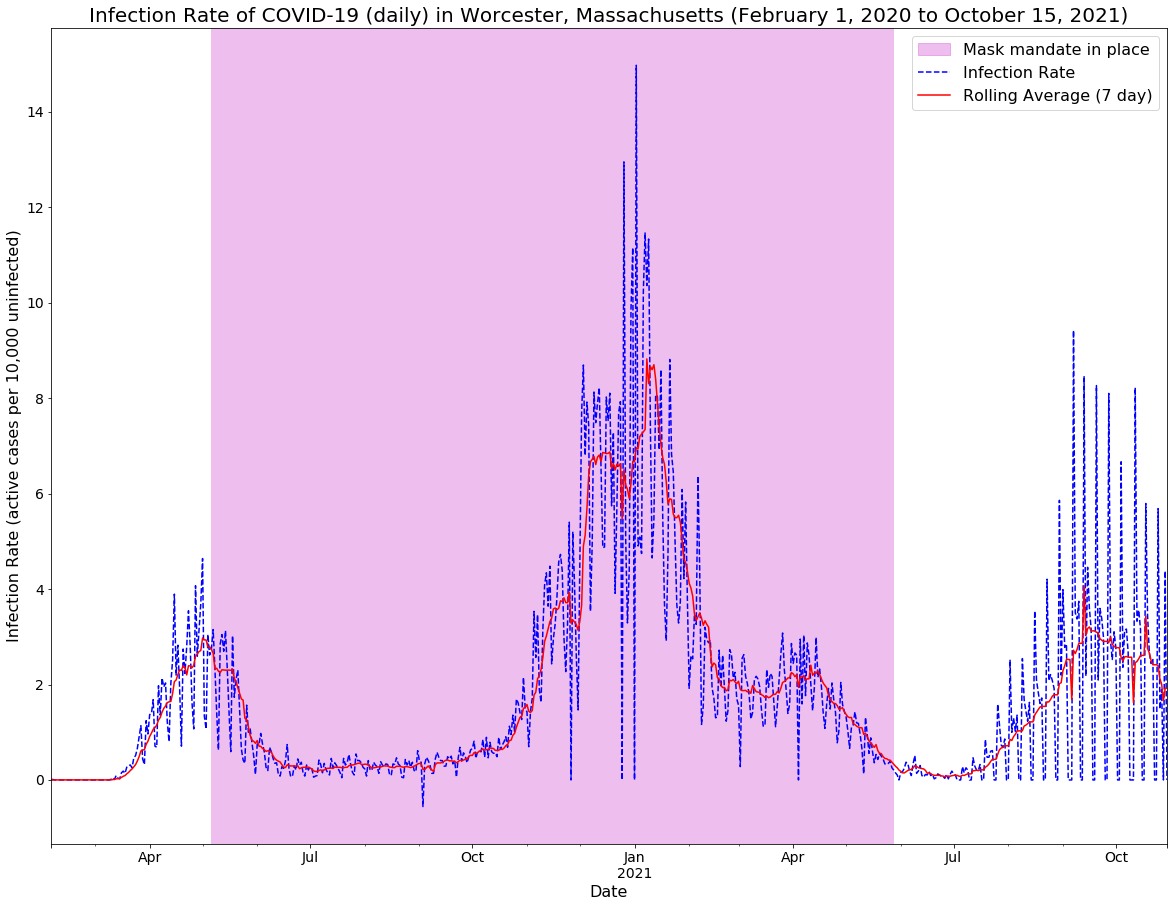

In [29]:
final_df[["Date", "InfectionRate", "RollingAverageIR"]].plot(x="Date", figsize=(20,15), style=['b--', 'r-'])

legend_elements = [mpatches.Patch(color='m', alpha=0.25, label='Mask mandate in place')]
legend_elements.append(plt.Line2D((0,1),(0,0), color='b', marker='', linestyle='--', label='Infection Rate'))
legend_elements.append(plt.Line2D((0,1),(0,0), color='r', marker='', linestyle='-', label='Rolling Average (7 day)'))
plt.legend(fontsize='16', handles=legend_elements)

plt.xlabel('Date', fontsize='16')
plt.xticks(fontsize='14')
plt.ylabel('Infection Rate (active cases per 10,000 uninfected)', fontsize='16')
plt.yticks(fontsize='14')
plt.title('Infection Rate of COVID-19 (daily) in Worcester, Massachusetts (February 1, 2020 to October 15, 2021)', fontsize='20')

plt.axvspan('2020-05-06', '2021-05-28', facecolor='m', alpha=0.25)

plt.savefig('WorcesterInfectionRate.png')    
plt.show()

## Analysis

Preview columns available in data for analysis

In [30]:
final_df.columns

Index(['Date', 'NewConfirmedCases', 'CumuConfirmedCases',
       'Average daily wind speed (mph)', 'Precipitation (in)', 'Snowfall (in)',
       'Average temperature (°F)', 'Minimum temperature (°F)',
       'Maximum temperature (°F)', 'Fog, ice fog, or freezing fog',
       'Heavy fog or heaving freezing fog', 'Thunder', 'Glaze or rime ',
       'Smoke or haze', 'Average relative humidity', 'RollingAverage',
       'RateOfChange', 'RollingAverageRoC', 'ActiveCases', 'AtRiskPop',
       'InfectionRate', 'RollingAverageIR', 'AverageTempWeek',
       'AverageTempLastWeek', 'ChangeInAverageTempWeek', 'AveragePrecipWeek',
       'AverageSnowWeek', 'ChangeInTempDay', 'MinimumTempWeek',
       'MaximumTempWeek', 'TotalPrecipWeek', 'TotalSnowfallWeek', 'season',
       'isFall', 'isWinter', 'isSpring'],
      dtype='object')

### Analysis 1

Select fields, compare their correlation with response variable, rolling average of new cases, and other predictors. Remove excessively correlated variables >0.7

Train multivariate linear regression, review intercept, R^2, coefficients (same from both sklearn & statsmodels). Visualize the predicted vs actual values.

In [31]:
final_df[['Average daily wind speed (mph)', 'Precipitation (in)', 'Snowfall (in)',
       'Average temperature (°F)', 'Minimum temperature (°F)', 'Maximum temperature (°F)', 'RollingAverage']].corr()

,Average daily wind speed (mph),Precipitation (in),Snowfall (in),Average temperature (°F),Minimum temperature (°F),Maximum temperature (°F),RollingAverage
Average daily wind speed (mph),1.000000,0.051747,0.099408,-0.256220,-0.294840,-0.237957,0.130255
Precipitation (in),0.051747,1.000000,0.200829,0.019955,0.052590,-0.013100,0.000828
Snowfall (in),0.099408,0.200829,1.000000,-0.217166,-0.186672,-0.230974,0.164688
Average temperature (°F),-0.256220,0.019955,-0.217166,1.000000,0.980696,0.979893,-0.523767
Minimum temperature (°F),-0.294840,0.052590,-0.186672,0.980696,1.000000,0.946365,-0.501912
Maximum temperature (°F),-0.237957,-0.013100,-0.230974,0.979893,0.946365,1.000000,-0.534565
RollingAverage,0.130255,0.000828,0.164688,-0.523767,-0.501912,-0.534565,1.000000


Remove min and max temp due to being overly correlated with average

In [32]:
X = final_df[['Average daily wind speed (mph)', 'Precipitation (in)', 'Snowfall (in)',
       'Average temperature (°F)']].fillna(0) #, 'Minimum temperature (°F)', 'Maximum temperature (°F)'
y = final_df[['RollingAverage']]

In [33]:
from sklearn.preprocessing import StandardScaler

Xscaler = StandardScaler().fit(X)
X_std = Xscaler.transform(X)

Yscaler = StandardScaler().fit(y) 
y_std = Yscaler.transform(y).flatten()

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
reg = lr.fit(X, y)

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Users/castle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,

In [35]:
reg.score(X, y)

0.2770982249554794

In [36]:
reg.coef_

array([[-0.30860947,  0.26766346,  8.93369467, -4.95171937]])

In [37]:
reg.intercept_

array([414.28411087])

In [38]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:         RollingAverage   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     60.28
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           4.22e-43
Time:                        20:50:17   Log-Likelihood:                -4020.9
No. Observations:                 634   AIC:                             8052.
Df Residuals:                     629   BIC:                             8074.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
analysis1 = final_df[['Date', 'Average daily wind speed (mph)', 'Precipitation (in)', 'Snowfall (in)',
       'Average temperature (°F)', 'RollingAverage']]
analysis1["prediction"] = reg.predict(X).flatten()
analysis1

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Average daily wind speed (mph),Precipitation (in),Snowfall (in),Average temperature (°F),RollingAverage,prediction
13,2020-02-05,6.71,0.05,0.0,36.0,0.0,233.964827
14,2020-02-06,8.95,0.31,0.5,29.0,0.0,272.472017
15,2020-02-07,16.33,0.38,0.0,31.0,0.0,255.842930
16,2020-02-08,15.66,0.00,0.0,23.0,0.0,295.561741
17,2020-02-09,5.82,0.00,0.0,22.0,0.0,303.550178
...,...,...,...,...,...,...,...
642,2021-10-26,14.54,1.29,0.0,49.0,182.0,167.507966
643,2021-10-27,16.11,0.31,0.0,48.0,173.0,171.712858
644,2021-10-28,5.82,0.02,0.0,44.0,143.0,194.617705
645,2021-10-29,9.17,0.00,0.0,42.0,165.0,203.481948


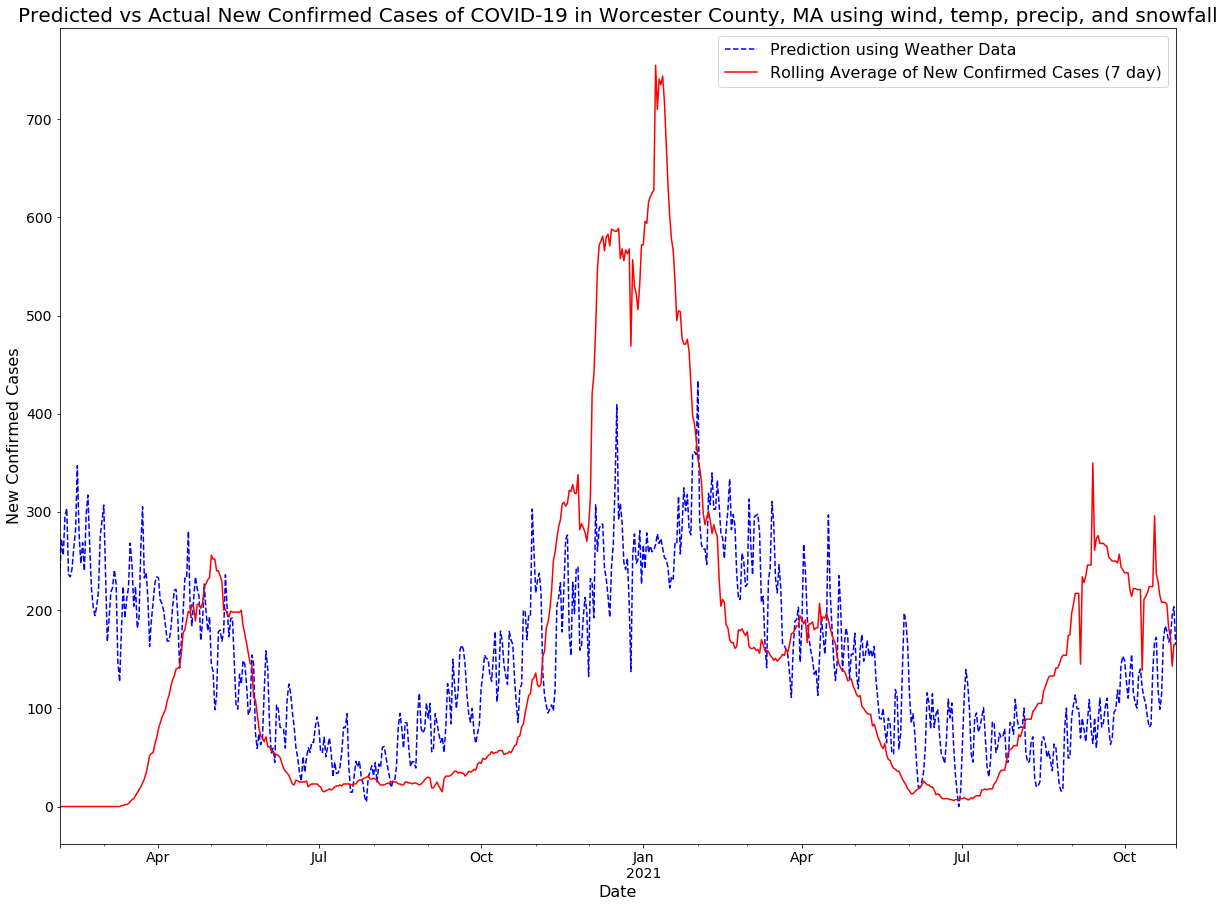

In [40]:
analysis1[["Date", "prediction", "RollingAverage"]].plot(x="Date", figsize=(20,15), style=['b--', 'r-'])

legend_elements = [plt.Line2D((0,1),(0,0), color='b', marker='', linestyle='--', label='Prediction using Weather Data')]
legend_elements.append(plt.Line2D((0,1),(0,0), color='r', marker='', linestyle='-', label='Rolling Average of New Confirmed Cases (7 day)'))
plt.legend(fontsize='16', handles=legend_elements)

plt.xlabel('Date', fontsize='16')
plt.xticks(fontsize='14')
plt.ylabel('New Confirmed Cases', fontsize='16')
plt.yticks(fontsize='14')
plt.title('Predicted vs Actual New Confirmed Cases of COVID-19 in Worcester County, MA using wind, temp, precip, and snowfall', fontsize='20')

plt.savefig('PredictedVsActualAnalysis1.png')    
plt.show()

### Analysis 2

Select fields, compare their correlation with response variable, rolling average of new cases, and other predictors. Remove excessively correlated variables >0.7

Train multivariate linear regression, review intercept, R^2, coefficients (same from both sklearn & statsmodels). Visualize the predicted vs actual values.

In [41]:
final_df[['isFall', 'isWinter', 'isSpring', 'RollingAverage']].corr()

,isFall,isWinter,isSpring,RollingAverage
isFall,1.000000,-0.263197,-0.357534,0.036169
isWinter,-0.263197,1.000000,-0.301001,0.594099
isSpring,-0.357534,-0.301001,1.000000,-0.100291
RollingAverage,0.036169,0.594099,-0.100291,1.000000


In [42]:
X = final_df[['isFall', 'isWinter', 'isSpring']]
y = final_df[['RollingAverage']]

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
reg = lr.fit(X, y)

In [44]:
reg.score(X, y)

0.43326910216154757

In [45]:
reg.coef_

array([[121.19579614, 314.75652174,  85.38586957]])

In [46]:
reg.intercept_

array([39.95652174])

In [47]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         RollingAverage   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     160.5
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           2.72e-77
Time:                        20:50:19   Log-Likelihood:                -3943.8
No. Observations:                 634   AIC:                             7896.
Df Residuals:                     630   BIC:                             7913.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9565      9.000      4.440      0.0

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
analysis2 = final_df[['Date', 'isFall', 'isWinter', 'isSpring', 'RollingAverage']]
analysis2["prediction"] = reg.predict(X).flatten()
analysis2

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,isFall,isWinter,isSpring,RollingAverage,prediction
13,2020-02-05,0,1,0,0.0,354.713043
14,2020-02-06,0,1,0,0.0,354.713043
15,2020-02-07,0,1,0,0.0,354.713043
16,2020-02-08,0,1,0,0.0,354.713043
17,2020-02-09,0,1,0,0.0,354.713043
...,...,...,...,...,...,...
642,2021-10-26,1,0,0,182.0,161.152318
643,2021-10-27,1,0,0,173.0,161.152318
644,2021-10-28,1,0,0,143.0,161.152318
645,2021-10-29,1,0,0,165.0,161.152318


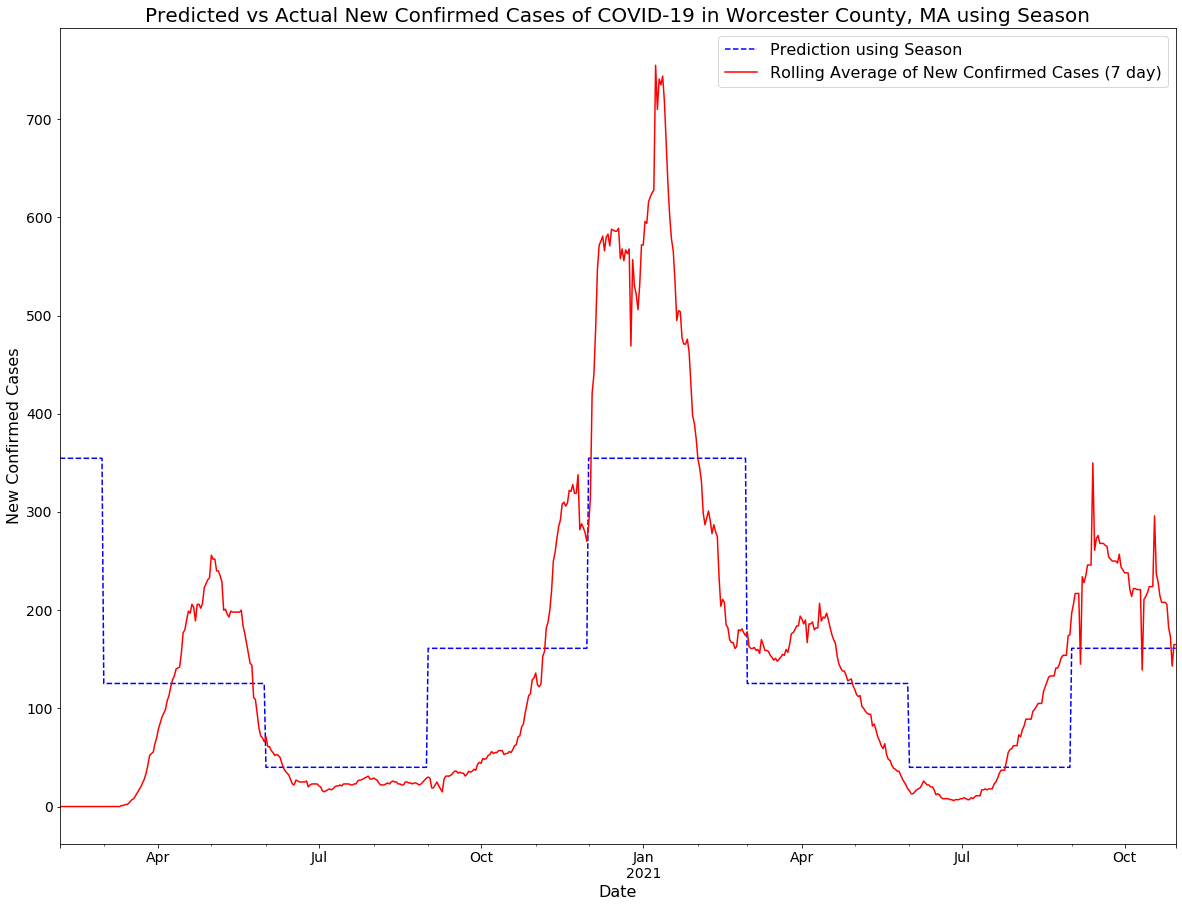

In [49]:
analysis2[["Date", "prediction", "RollingAverage"]].plot(x="Date", figsize=(20,15), style=['b--', 'r-'])

legend_elements = [plt.Line2D((0,1),(0,0), color='b', marker='', linestyle='--', label='Prediction using Season')]
legend_elements.append(plt.Line2D((0,1),(0,0), color='r', marker='', linestyle='-', label='Rolling Average of New Confirmed Cases (7 day)'))
plt.legend(fontsize='16', handles=legend_elements)

plt.xlabel('Date', fontsize='16')
plt.xticks(fontsize='14')
plt.ylabel('New Confirmed Cases', fontsize='16')
plt.yticks(fontsize='14')
plt.title('Predicted vs Actual New Confirmed Cases of COVID-19 in Worcester County, MA using Season', fontsize='20')

plt.savefig('PredictedVsActualAnalysis2.png')    
plt.show()

### Analysis 3

Select fields, compare their correlation with response variable, rolling average of new cases, and other predictors. Remove excessively correlated variables >0.7

Train multivariate linear regression, review intercept, R^2, coefficients (same from both sklearn & statsmodels). Visualize the predicted vs actual values.

In [50]:
final_df[['Average daily wind speed (mph)', 'Precipitation (in)', 'Snowfall (in)',
       'Average temperature (°F)', 'isFall', 'isWinter', 'isSpring', 'RollingAverage']].corr()

,Average daily wind speed (mph),Precipitation (in),Snowfall (in),Average temperature (°F),isFall,isWinter,isSpring,RollingAverage
Average daily wind speed (mph),1.000000,0.051747,0.099408,-0.256220,-0.107507,0.130145,0.256004,0.130255
Precipitation (in),0.051747,1.000000,0.200829,0.019955,0.052263,-0.021277,-0.041208,0.000828
Snowfall (in),0.099408,0.200829,1.000000,-0.217166,-0.057132,0.209518,-0.031873,0.164688
Average temperature (°F),-0.256220,0.019955,-0.217166,1.000000,0.105018,-0.648306,-0.218333,-0.523767
isFall,-0.107507,0.052263,-0.057132,0.105018,1.000000,-0.263197,-0.357534,0.036169
isWinter,0.130145,-0.021277,0.209518,-0.648306,-0.263197,1.000000,-0.301001,0.594099
isSpring,0.256004,-0.041208,-0.031873,-0.218333,-0.357534,-0.301001,1.000000,-0.100291
RollingAverage,0.130255,0.000828,0.164688,-0.523767,0.036169,0.594099,-0.100291,1.000000


In [51]:
X = final_df[['Average daily wind speed (mph)', 'Precipitation (in)', 'Snowfall (in)',
       'Average temperature (°F)', 'isFall', 'isWinter', 'isSpring']].fillna(0) #, 'Minimum temperature (°F)', 'Maximum temperature (°F)'
y = final_df[['RollingAverage']]

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
reg = lr.fit(X, y)

In [53]:
reg.score(X, y)

0.43537362121478096

In [54]:
reg.coef_

array([[ 1.44906705e-01,  1.26231672e+00,  5.06385198e+00,
        -5.41491205e-01,  1.13019721e+02,  2.89503163e+02,
         7.19198109e+01]])

In [55]:
reg.intercept_

array([76.66854863])

In [56]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:         RollingAverage   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     68.96
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           1.34e-73
Time:                        20:50:20   Log-Likelihood:                -3942.6
No. Observations:                 634   AIC:                             7901.
Df Residuals:                     626   BIC:                             7937.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
analysis3 = final_df[['Date', 'Average daily wind speed (mph)', 'Precipitation (in)', 'Snowfall (in)',
       'Average temperature (°F)', 'isFall', 'isWinter', 'isSpring', 'RollingAverage']]
analysis3["prediction"] = reg.predict(X).flatten()
analysis3

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Average daily wind speed (mph),Precipitation (in),Snowfall (in),Average temperature (°F),isFall,isWinter,isSpring,RollingAverage,prediction
13,2020-02-05,6.71,0.05,0.0,36.0,0,1,0,0.0,347.713468
14,2020-02-06,8.95,0.31,0.5,29.0,0,1,0,0.0,354.688626
15,2020-02-07,16.33,0.38,0.0,31.0,0,1,0,0.0,352.231491
16,2020-02-08,15.66,0.00,0.0,23.0,0,1,0,0.0,355.986653
17,2020-02-09,5.82,0.00,0.0,22.0,0,1,0,0.0,355.102262
...,...,...,...,...,...,...,...,...,...,...
642,2021-10-26,14.54,1.29,0.0,49.0,1,0,0,182.0,166.890532
643,2021-10-27,16.11,0.31,0.0,48.0,1,0,0,173.0,166.422457
644,2021-10-28,5.82,0.02,0.0,44.0,1,0,0,143.0,166.731260
645,2021-10-29,9.17,0.00,0.0,42.0,1,0,0,165.0,168.274433


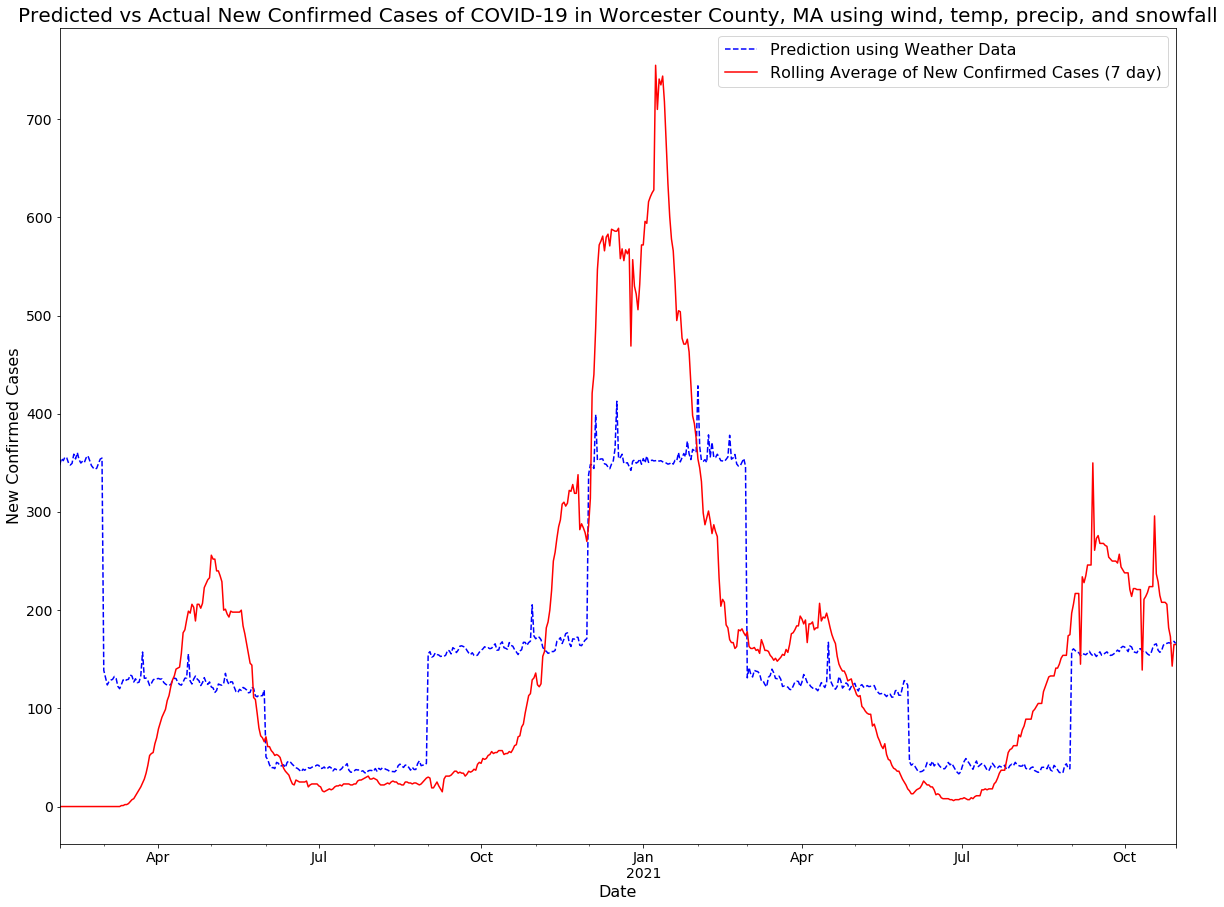

In [58]:
analysis3[["Date", "prediction", "RollingAverage"]].plot(x="Date", figsize=(20,15), style=['b--', 'r-'])

legend_elements = [plt.Line2D((0,1),(0,0), color='b', marker='', linestyle='--', label='Prediction using Weather Data')]
legend_elements.append(plt.Line2D((0,1),(0,0), color='r', marker='', linestyle='-', label='Rolling Average of New Confirmed Cases (7 day)'))
plt.legend(fontsize='16', handles=legend_elements)

plt.xlabel('Date', fontsize='16')
plt.xticks(fontsize='14')
plt.ylabel('New Confirmed Cases', fontsize='16')
plt.yticks(fontsize='14')
plt.title('Predicted vs Actual New Confirmed Cases of COVID-19 in Worcester County, MA using wind, temp, precip, and snowfall', fontsize='20')

plt.savefig('PredictedVsActualAnalysis3.png')    
plt.show()

### Analysis 4

Select fields, compare their correlation with response variable, rolling average of new cases, and other predictors. Remove excessively correlated variables > 0.7

Train multivariate linear regression, review intercept, R^2, coefficients (same from both sklearn & statsmodels). Visualize the predicted vs actual values.

In [59]:
final_df[['Glaze or rime ', 'Average relative humidity', 'AverageTempWeek','ChangeInAverageTempWeek', 'AveragePrecipWeek',
       'AverageSnowWeek', 'ChangeInTempDay', 'TotalPrecipWeek', 'TotalSnowfallWeek', 'isFall', 'isWinter', 'isSpring', 'RollingAverage']].corr()

,Glaze or rime,Average relative humidity,AverageTempWeek,ChangeInAverageTempWeek,AveragePrecipWeek,AverageSnowWeek,ChangeInTempDay,TotalPrecipWeek,TotalSnowfallWeek,isFall,isWinter,isSpring,RollingAverage
Glaze or rime,1.000000,0.132555,-0.186207,-0.080314,0.008280,0.136957,-0.174290,-0.011177,NaN,-0.074296,0.219588,-0.031737,0.068627
Average relative humidity,0.132555,1.000000,0.244250,-0.048950,0.302394,0.009150,-0.450187,0.112234,NaN,0.225819,-0.024853,-0.351218,0.009329
AverageTempWeek,-0.186207,0.244250,1.000000,0.186396,0.047562,-0.477742,0.173983,0.031251,NaN,0.145598,-0.678051,-0.260451,-0.530655
ChangeInAverageTempWeek,-0.080314,-0.048950,0.186396,1.000000,-0.204290,-0.187112,0.108637,0.040716,NaN,-0.220774,-0.055243,0.204164,-0.115774
AveragePrecipWeek,0.008280,0.302394,0.047562,-0.204290,1.000000,0.072982,-0.210944,0.164557,NaN,0.057875,-0.003350,-0.118046,0.037971
AverageSnowWeek,0.136957,0.009150,-0.477742,-0.187112,0.072982,1.000000,-0.229649,-0.028856,NaN,-0.135723,0.491343,-0.070423,0.374156
ChangeInTempDay,-0.174290,-0.450187,0.173983,0.108637,-0.210944,-0.229649,1.000000,-0.113300,NaN,-0.054827,-0.291787,0.221541,-0.241610
TotalPrecipWeek,-0.011177,0.112234,0.031251,0.040716,0.164557,-0.028856,-0.113300,1.000000,NaN,-0.047033,-0.039596,0.052118,-0.042586
TotalSnowfallWeek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isFall,-0.074296,0.225819,0.145598,-0.220774,0.057875,-0.135723,-0.054827,-0.047033,NaN,1.000000,-0.263197,-0.357534,0.036169


In [60]:
X = final_df[['Glaze or rime ', 'Average relative humidity', 'AverageTempWeek','ChangeInAverageTempWeek', 'AveragePrecipWeek',
       'AverageSnowWeek', 'ChangeInTempDay', 'TotalPrecipWeek', 'isFall', 'isWinter', 'isSpring', 'TotalSnowfallWeek']]
y = final_df[['RollingAverage']]

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
reg = lr.fit(X, y)

In [62]:
reg.score(X, y)

0.45167372816639473

In [63]:
reg.coef_

array([[-1.04952300e+02,  2.83432065e-01,  4.47667994e-01,
        -1.28339625e+00,  2.38078884e+01,  2.86680322e+01,
        -1.43694043e+00, -2.96261812e+03,  1.18868000e+02,
         3.18084919e+02,  1.03361264e+02,  0.00000000e+00]])

In [64]:
reg.intercept_

array([10.15640943])

In [65]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:         RollingAverage   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     46.58
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           6.48e-74
Time:                        20:50:21   Log-Likelihood:                -3933.3
No. Observations:                 634   AIC:                             7891.
Df Residuals:                     622   BIC:                             7944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/castle/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/castle/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [66]:
analysis4 = final_df[['Date', 'Glaze or rime ', 'Average relative humidity', 'AverageTempWeek','ChangeInAverageTempWeek', 'AveragePrecipWeek',
       'AverageSnowWeek', 'ChangeInTempDay', 'TotalPrecipWeek', 'TotalSnowfallWeek', 'isFall', 'isWinter', 'isSpring', 'RollingAverage']]
analysis4["prediction"] = reg.predict(X).flatten()
analysis4

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Glaze or rime,Average relative humidity,AverageTempWeek,ChangeInAverageTempWeek,AveragePrecipWeek,AverageSnowWeek,ChangeInTempDay,TotalPrecipWeek,TotalSnowfallWeek,isFall,isWinter,isSpring,RollingAverage,prediction
13,2020-02-05,0.0,60.846154,31.857143,-2.428571,0.010000,0.042857,13.0,0.0,0.0,0,1,0,0.0,345.651806
14,2020-02-06,1.0,87.784615,32.714286,-0.285714,0.054286,0.114286,8.0,0.0,0.0,0,1,0,0.0,256.255078
15,2020-02-07,1.0,88.761194,33.000000,1.142857,0.107143,0.114286,18.0,0.0,0.0,0,1,0,0.0,241.715366
16,2020-02-08,0.0,60.035714,31.714286,0.285714,0.105714,0.071429,11.0,0.0,0.0,0,1,0,0.0,347.846367
17,2020-02-09,0.0,72.028571,30.142857,-0.571429,0.105714,0.071429,17.0,0.0,0.0,0,1,0,0.0,343.020460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2021-10-26,0.0,97.850000,53.285714,-5.571429,0.254286,0.000000,11.0,0.0,0.0,1,0,0,182.0,178.010557
643,2021-10-27,0.0,90.400000,51.714286,-6.714286,0.298571,0.000000,6.0,0.0,0.0,1,0,0,173.0,184.901300
644,2021-10-28,0.0,81.687500,49.000000,-9.142857,0.301429,0.000000,9.0,0.0,0.0,1,0,0,143.0,180.090820
645,2021-10-29,0.0,79.222222,46.428571,-10.714286,0.301429,0.000000,6.0,0.0,0.0,1,0,0,165.0,184.568522


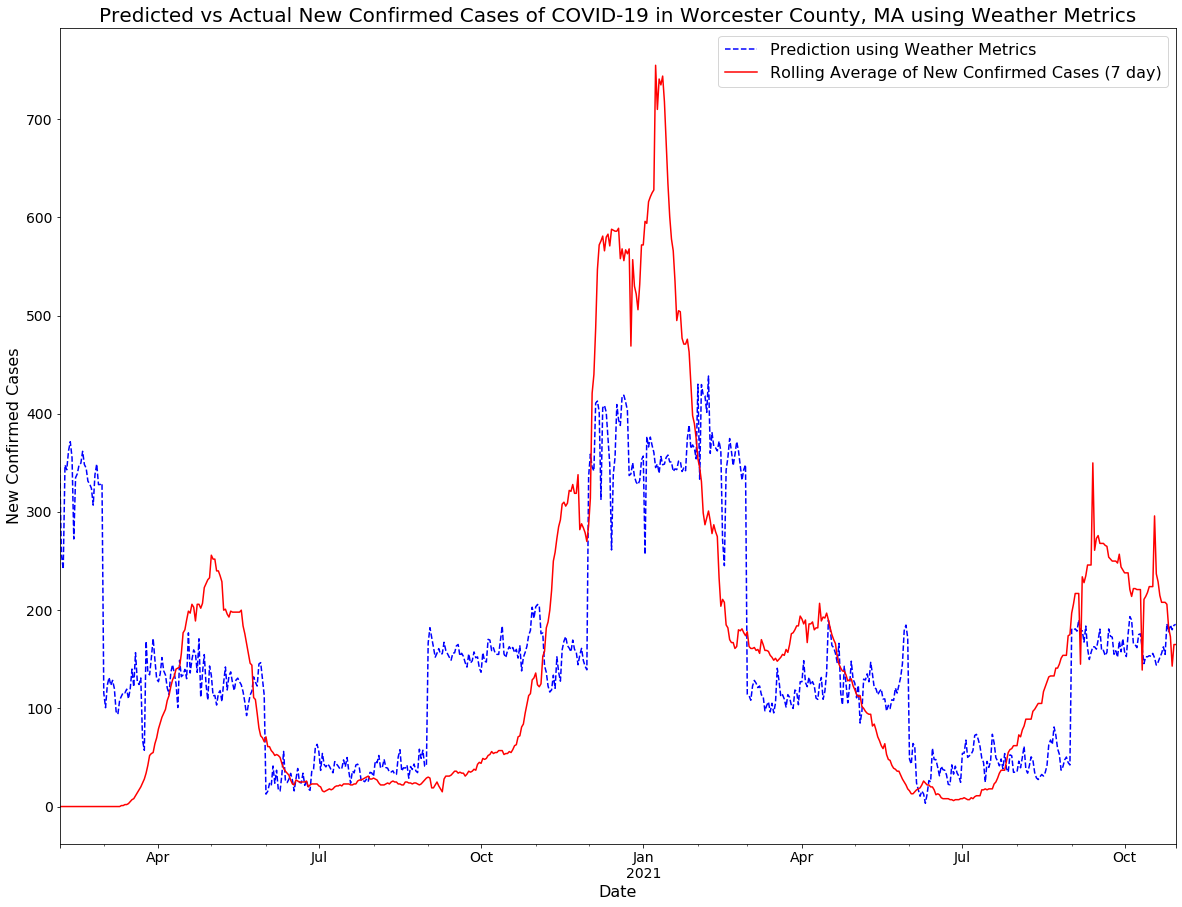

In [67]:
analysis4[["Date", "prediction", "RollingAverage"]].plot(x="Date", figsize=(20,15), style=['b--', 'r-'])

legend_elements = [plt.Line2D((0,1),(0,0), color='b', marker='', linestyle='--', label='Prediction using Weather Metrics')]
legend_elements.append(plt.Line2D((0,1),(0,0), color='r', marker='', linestyle='-', label='Rolling Average of New Confirmed Cases (7 day)'))
plt.legend(fontsize='16', handles=legend_elements)

plt.xlabel('Date', fontsize='16')
plt.xticks(fontsize='14')
plt.ylabel('New Confirmed Cases', fontsize='16')
plt.yticks(fontsize='14')
plt.title('Predicted vs Actual New Confirmed Cases of COVID-19 in Worcester County, MA using Weather Metrics', fontsize='20')

plt.savefig('PredictedVsActualAnalysis4.png')    
plt.show()